## MOVIES DATA ANALYSIS AND VISUALIZATION  

While learning data science, I developed an interest in this domain which eventually led me to making a project that analyses the movies dataset available on Kaggle. I downloaded the dataset from Kaggle and worked upon it.


This project covers the following topics:

- Reading a CSV file into a Pandas data frame
- Retrieving data from Pandas data frames
- Querying, soring, and analyzing data
- Merging, grouping, and aggregation of data
- Extracting useful information from dates
- Basic plotting using line and bar charts
- Writing data frames to CSV files

## Downloading the Dataset

To start working on our project, we have to first download our dataset from kaggle. I chose the dataset containing the movies and its informations. We download it using opendatasets library of python.

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/download?datasetVersionNumber=7'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: soumyashubham
Your Kaggle Key: ··········


100%|██████████| 228M/228M [00:01<00:00, 165MB/s]


The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './the-movies-dataset'

In [ ]:
import os
os.listdir(data_dir)

['links_small.csv',
 'movies_metadata.csv',
 'links.csv',
 'ratings.csv',
 'ratings_small.csv',
 'credits.csv',
 'keywords.csv']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation and Cleaning

Now that we have downloaded the dataset, it is time to prepare and clean the data using pandas so that it becomes ready to use and we can gain useful insights from the data



In [ ]:
movies_data=pd.read_csv('/content/the-movies-dataset/movies_metadata.csv',dtype='unicode')

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   adult                  45466 non-null  object
 1   belongs_to_collection  4494 non-null   object
 2   budget                 45466 non-null  object
 3   genres                 45466 non-null  object
 4   homepage               7782 non-null   object
 5   id                     45466 non-null  object
 6   imdb_id                45449 non-null  object
 7   original_language      45455 non-null  object
 8   original_title         45466 non-null  object
 9   overview               44512 non-null  object
 10  popularity             45461 non-null  object
 11  poster_path            45080 non-null  object
 12  production_companies   45463 non-null  object
 13  production_countries   45463 non-null  object
 14  release_date           45379 non-null  object
 15  revenue            

All columns have type object because they most likely contain null values and is loaded in that form as guessing dtypes of each column is very memory demanding, especially when your dataset is large as Pandas tries to determine what dtype to set by analyzing the data in each column. The total number of rows is 45466 while almost none of the rows have non-null values as 45466. So we can see that a lot of cleaning is to be done on the data.

In [ ]:
movies_data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0


As all columns are loaded in the form of objects, some of them should be numeric so that we can analyze the data properly by using numeric values. So let's fix the data type of these columns.

In [ ]:
movies_data['revenue']=pd.to_numeric(movies_data['revenue'], errors='coerce')
movies_data['budget']=pd.to_numeric(movies_data['budget'], errors='coerce')
movies_data['popularity']=pd.to_numeric(movies_data['popularity'], errors='coerce')
movies_data['vote_average']=pd.to_numeric(movies_data['vote_average'], errors='coerce')
movies_data['vote_count']=pd.to_numeric(movies_data['vote_count'], errors='coerce')
movies_data['runtime']=pd.to_numeric(movies_data['runtime'], errors='coerce')
movies_data['id']=pd.to_numeric(movies_data['id'], errors='coerce')

Now we can see that the data type of our selected columns has been converted into float64

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45463 non-null  float64
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45463 non-null  float64
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
movies_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45463.000000,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,108359.918813,2.921478,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,112460.749278,6.005414,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26449.500000,0.385948,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,60003.000000,1.127685,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157328.000000,3.678902,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


Now since we have the desired columns in numeric values, we can see that there are a lot of issues with them.The number of outliers present in these columns are significant, so we remove those outliers.

In [ ]:
#Cleaning the data by removing outliers
movies_data.drop(movies_data[movies_data['budget']>45000000].index,inplace=True)
movies_data.drop(movies_data[movies_data['budget']<5500000].index,inplace=True)
movies_data.drop(movies_data[movies_data['popularity']<3].index,inplace=True)
movies_data.drop(movies_data[movies_data['popularity']>30].index,inplace=True)
movies_data.drop(movies_data[movies_data['revenue']<10000000].index,inplace=True)
movies_data.drop(movies_data[movies_data['revenue']>90000000].index,inplace=True)
movies_data.drop(movies_data[movies_data['vote_count']<50].index,inplace=True)
movies_data.drop(movies_data[movies_data['vote_count']>800].index,inplace=True)
movies_data.drop(movies_data[movies_data['vote_average']<1].index,inplace=True)

We can now see that the outliers have been removed, and the variation among the values of the columns like budget, popularity, revenue, vote_count and vote_average have been minimized.

In [ ]:
movies_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,1.207000e+03,1207.000000,1207.000000,1.207000e+03,1207.000000,1207.000000,1207.000000
mean,2.079581e+07,48580.219553,8.790271,3.710383e+07,108.173985,6.122370,284.221210
std,1.037724e+07,88101.732899,3.145005,2.112927e+07,19.912234,0.801665,191.844909
min,5.500000e+06,16.000000,3.319516,1.000681e+07,0.000000,2.800000,50.000000
25%,1.200000e+07,9411.500000,6.493645,1.888582e+07,95.500000,5.600000,130.500000
50%,2.000000e+07,11542.000000,8.236472,3.210100e+07,105.000000,6.200000,237.000000
75%,2.800000e+07,27757.500000,10.723675,5.131313e+07,117.000000,6.700000,391.000000
max,4.500000e+07,418437.000000,24.644321,8.980000e+07,248.000000,7.900000,795.000000


Now let us deal with the null values. We can first calculate the percentage of null values in each column.

In [ ]:
null_vals_percent=movies_data.isna().sum()*100/movies_data.shape[0]
null_vals_percent

adult                     0.000000
belongs_to_collection    79.917355
budget                    0.247934
genres                    0.000000
homepage                 70.661157
id                        0.247934
imdb_id                   0.000000
original_language         0.000000
original_title            0.000000
overview                  0.165289
popularity                0.247934
poster_path               0.000000
production_companies      0.000000
production_countries      0.000000
release_date              0.000000
revenue                   0.247934
runtime                   0.247934
spoken_languages          0.247934
status                    0.247934
tagline                   9.586777
title                     0.247934
video                     0.247934
vote_average              0.247934
vote_count                0.247934
dtype: float64

We can drop some of the columns that provide no useful insights and have significantly higher number of NaN values.

In [ ]:
movies_data.drop(['belongs_to_collection','genres','homepage','imdb_id','poster_path','overview','production_companies',
                  'production_countries','tagline','original_title','video','id'],axis=1,inplace=True)

Now we can drop all the NaN values from the remaining columns

In [ ]:
movies_data.dropna(inplace=True)
movies_data.shape

(1207, 12)

## Exploratory Analysis and Visualization

Now that we have completed the data cleaning and our data is ready to be used, we can use matplotlob and seaborn libraries to perform data visualization. We can make interesting graphs for various columns of the dataframe and make necessary inferences from it.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (6, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

We can see clearly the basic stats for the revenue generated by movies using barplot in seaborn.

<Axes: ylabel='revenue'>

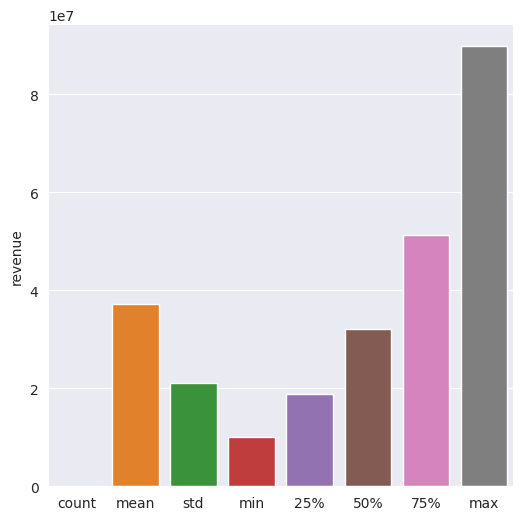

In [ ]:
sns.barplot(x=movies_data.describe()['revenue'].index,y=movies_data.describe()['revenue'],data = movies_data)

We can now see the basic stats for the budget required by movies using barplot in seaborn, and compare it with the revenue generated.

<Axes: ylabel='budget'>

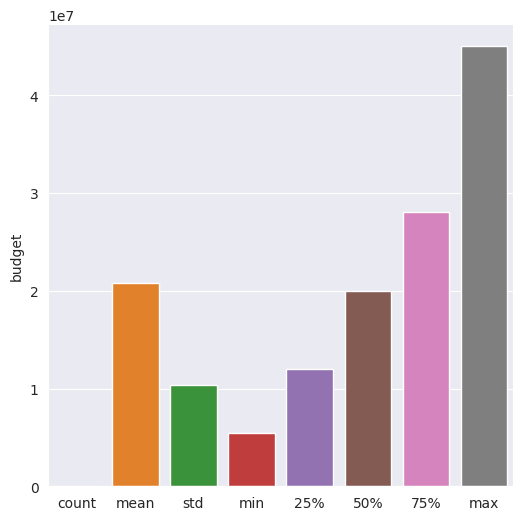

In [ ]:
sns.barplot(x=movies_data.describe()['budget'].index,y=movies_data.describe()['budget'],data = movies_data)

We can plot a histogram, showing the variations across the popularity of the movies.

<Axes: xlabel='popularity', ylabel='Count'>

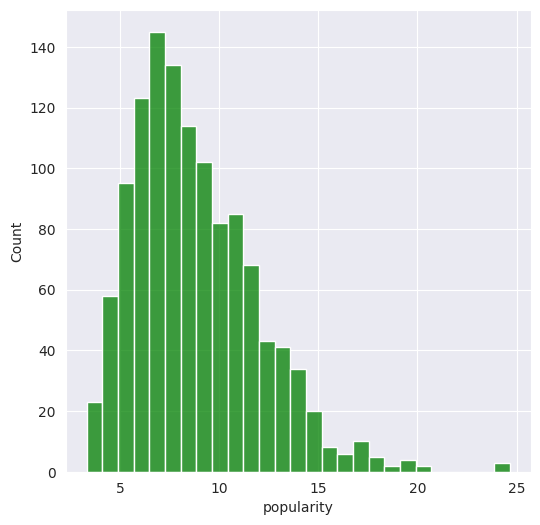

In [ ]:
sns.histplot(movies_data.popularity,color='green')

This is a scatterplot having budget on x-axis and revenue on y-axis, and popularity as hue

<Axes: xlabel='budget', ylabel='revenue'>

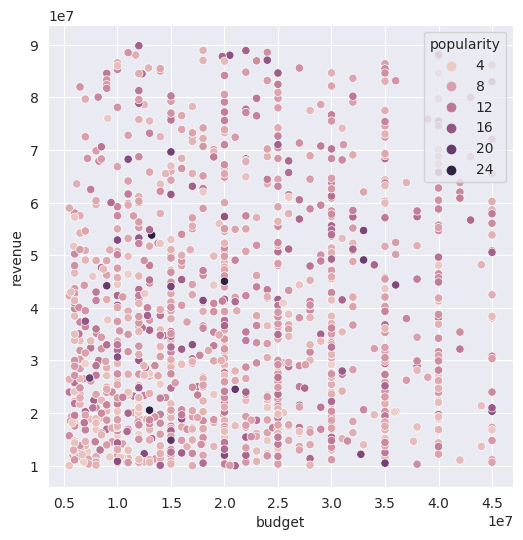

In [ ]:
sns.scatterplot(x=movies_data.budget,y=movies_data.revenue,hue=movies_data.popularity)

This graph shows the relationship between movie and its popularity, also comparing it amongst other movies' popularity.

<Figure size 600x600 with 0 Axes>

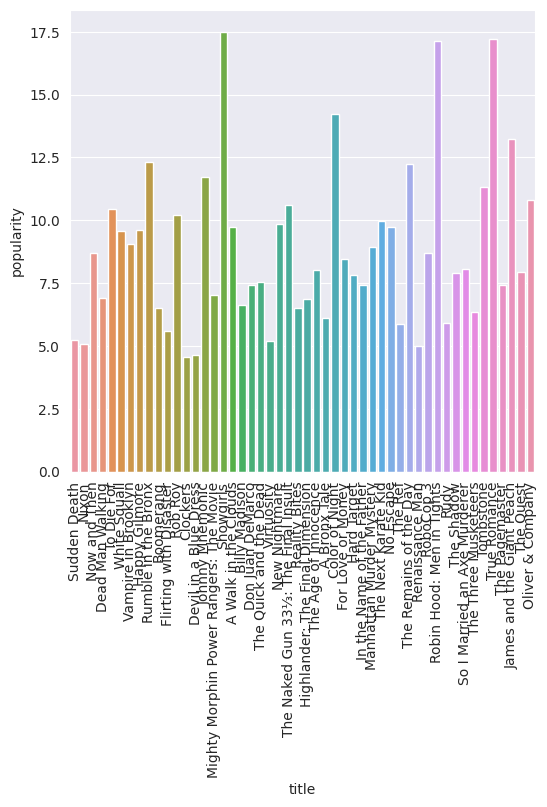

<Figure size 600x600 with 0 Axes>

In [ ]:
sns.barplot(x=movies_data.title.head(50),y=movies_data.popularity.head(50))
plt.xticks(rotation=90)
plt.figure()

Checking distribuition is crucial once we have deleted the null values, the graph should be identical which means the data has been reduced in order that the outputs won't be affected

Text(0.5, 1.0, 'Distribution plot')

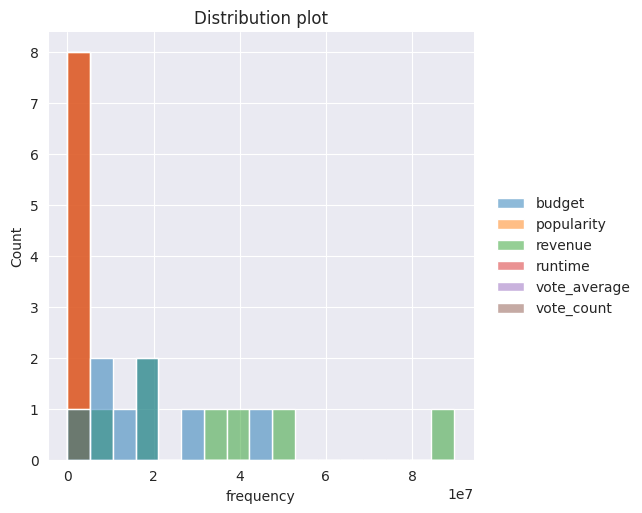

In [ ]:
sns.displot(movies_data.describe())
plt.xlabel('frequency');
plt.title('Distribution plot')

## Asking and Answering Questions

Since, we are done with the exploratory analysis of our dataset, we should ask some questions and try to answer them using our knowledge of python libraries



#### Q1: List all the movies with more budget than 40000000

We have to run a query to create a dataframe containing movies with more budget than 40000000

In [ ]:
movie_budget=movies_data[movies_data.budget>40000000]

We can display the title of all the movies with more budget than 40000000 by using movie_budget.title

In [ ]:
movie_budget.title

13                               Nixon
190                          Showgirls
743                        The Phantom
747                               Jack
828                            Tin Cup
1672                       Deep Rising
1985                     The Rocketeer
2692     Universal Soldier: The Return
3198                    Reindeer Games
3471                 Battlefield Earth
3894                 Finding Forrester
4570                      Original Sin
5148                       High Crimes
5162                The Sweetest Thing
7209                      Taking Lives
8219               Surviving Christmas
9473             Flight of the Phoenix
9617                           Elektra
10061                        Unleashed
10070              Kicking & Screaming
10187                          Rebound
10569               Yours, Mine & Ours
10642                    The Producers
10706                     Last Holiday
10797                         Firewall
11747                    

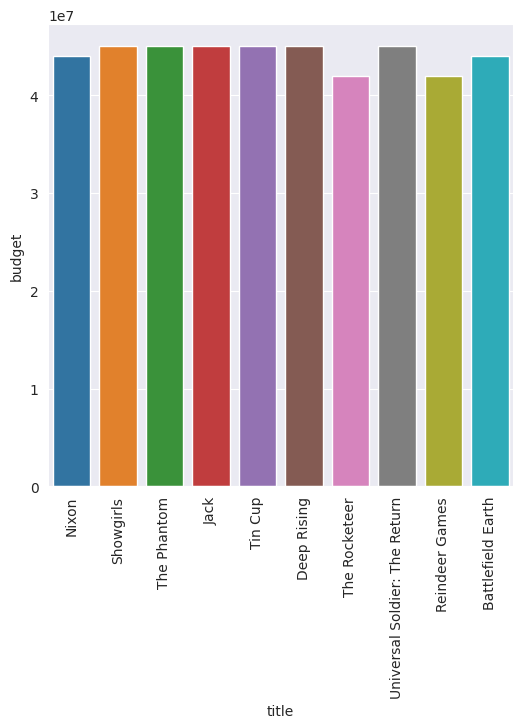

In [ ]:
sns.barplot(x=movie_budget.title.head(10),y=movie_budget.budget.head(10))
plt.xticks(rotation=90);

**Explanation**

We can plot the first 10 movies using sns.barplot() having movie titles on x-axis and budget on y-axis. We can see that all movies' budget are more than 40000000. Using plt.xticks function, we can change the orientation of movie titles on the x-axis

**Conclusion**

  By using shape attribute, we print the tuple containing the dimensions of the dataframe. The number of rows is 137, hence the number of movies having budget more than 40000000 is 37. As compared to the total number of movies in our cleaned data frame which is 1207, is much less.

In [ ]:
movie_budget.shape

(37, 12)




#### Q2: Is the budget proportional to the revenue?

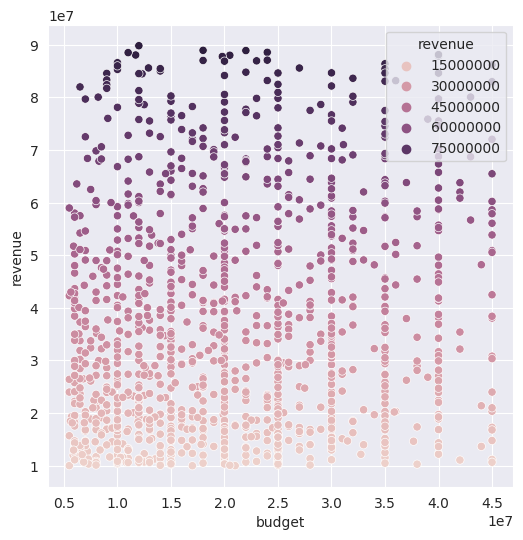

In [ ]:
sns.scatterplot(x=movies_data.budget,y=movies_data.revenue, hue=movies_data['revenue']);

**Explanation**

Using scatterplot, we can compare the correlation between the movie budget and its revenue. The hue can be set as the revenue.

**Conclusion**

We can see that the revenue has increased with the increase in the budget of the movie.

#### Q3: Find out the costliest movie in the entire data frame and list its title, author and publisher.

Let us first create a dataframe consisting of only price, author, title and publisher columns.

In [ ]:
costliest_movie= movies_data[['title','budget','original_language','popularity','release_date']]
costliest_movie=costliest_movie.sort_values(by='popularity',ascending=False)
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 8 to 44821
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              1207 non-null   object 
 1   budget             1207 non-null   float64
 2   original_language  1207 non-null   object 
 3   popularity         1207 non-null   float64
 4   release_date       1207 non-null   object 
 5   revenue            1207 non-null   float64
 6   runtime            1207 non-null   float64
 7   spoken_languages   1207 non-null   object 
 8   status             1207 non-null   object 
 9   title              1207 non-null   object 
 10  vote_average       1207 non-null   float64
 11  vote_count         1207 non-null   float64
dtypes: float64(6), object(6)
memory usage: 122.6+ KB


Now we can find out the maximum price of a book using max() function on the price column.

In [ ]:
max_price=costliest_movie.budget.max()
max_price

45000000.0

Let us print the author with maximum book price

In [ ]:
costliest_movie[costliest_movie.budget==45000000.0]

,title,budget,original_language,popularity,release_date
190,Showgirls,45000000.0,en,17.502375,1995-09-22
9473,Flight of the Phoenix,45000000.0,en,15.434731,2004-12-17
41888,Patriots Day,45000000.0,en,14.547939,2016-12-12
19151,Savages,45000000.0,en,13.248022,2012-07-06
13965,Aliens in the Attic,45000000.0,en,11.618472,2009-07-31
11747,Pathfinder,45000000.0,en,11.101549,2007-01-11
10569,"Yours, Mine & Ours",45000000.0,en,10.238422,2005-11-23
18156,The Rum Diary,45000000.0,en,10.110504,2011-10-13
10070,Kicking & Screaming,45000000.0,en,9.875573,2005-05-13
8219,Surviving Christmas,45000000.0,en,8.698971,2004-09-21


As we can see, there are several movies with maximized budget, so we decided to sort them according to their popularity.

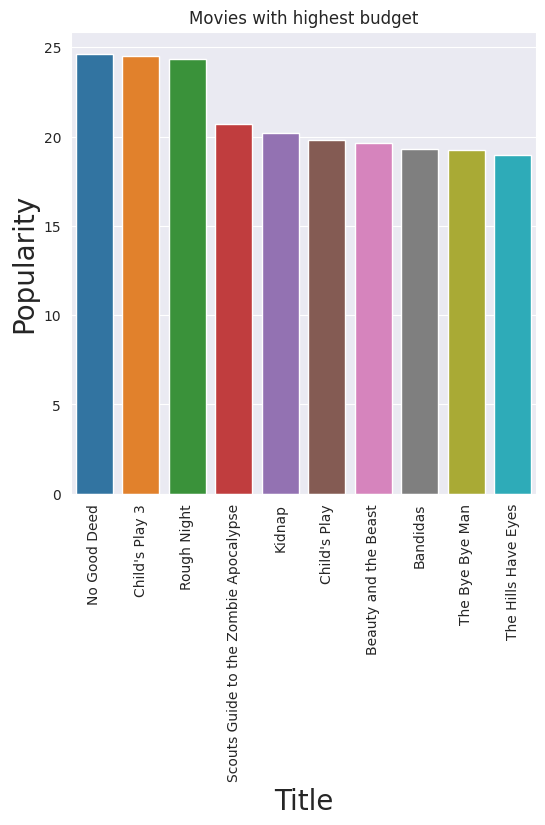

In [ ]:
sns.barplot(y = costliest_movie['popularity'].head(10), x = costliest_movie['title'].head(10))
plt.xticks(rotation = 90);
plt.title("Movies with highest budget");
plt.xlabel("Title", fontsize=20);
plt.ylabel("Popularity", fontsize=20);

Conclusion: As there are multiple movies with highest budget, here from the graph we can clearly see that No Good Deed is the most popular movie with the highest budget

#### Q4: Find out the average number of revenue generated by a movie and print all the statistics related to it. Plot them in a graph

The average number of revenue generated by a movie can be easily calculated through mean() function. The answer is approximately 37103831.308

In [ ]:
movies_data.revenue.mean()

37103831.308202155

Now we can display the statistics of revenue generated by movies using describe() function.

In [ ]:
movies_data.revenue.describe()

count    1.207000e+03
mean     3.710383e+07
std      2.112927e+07
min      1.000681e+07
25%      1.888582e+07
50%      3.210100e+07
75%      5.131313e+07
max      8.980000e+07
Name: revenue, dtype: float64

These results can be plotted using barplot function of seaborn

<Axes: ylabel='revenue'>

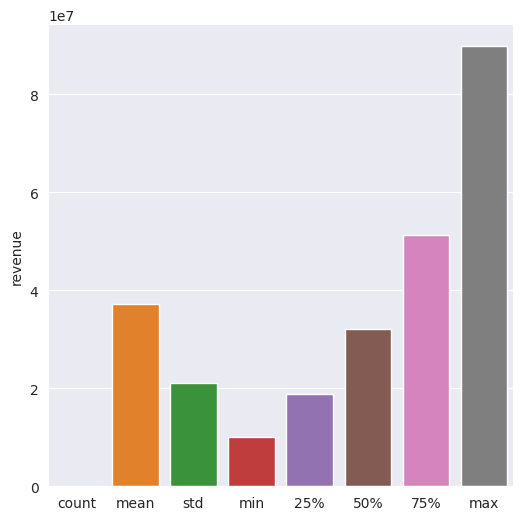

In [ ]:
sns.barplot(x=movies_data.describe()['revenue'].index,y=movies_data.describe()['revenue'])

**Explanation**

This barplot takes stats of revenue column on x-axis and amount of revenue generated on y-axis. It shows us all the important stats related to the revenue column clearly.

Let us save our work to the notebook by pressing Ctrl+S.

## References and Future Work

You can find the links to the resources that I found useful during the execution of this project and learn more about the tools and libraries used in it.


*   Kaggle Dataset:https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/download?datasetVersionNumber=7
*   Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
*   Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
*   Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
*   opendatasets Python library: https://github.com/JovianML/opendatasets






